# MNIST 복습

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# MNIST데이터 로드
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 -2 Layer Perceptron
model = keras.models.Sequential()
# 입력층 d=784, 은닉층레이어 H=50
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))
# 출력층 레이어 K=10
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-pack

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.5022 - acc: 0.8801
Epoch 2/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2339 - acc: 0.9337
Epoch 3/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1833 - acc: 0.9474
Epoch 4/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.153

In [2]:
# 모델 테스트 결과
# verbose2 :epoch당 1줄의 로그
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print('test_loss:{}'.format(test_loss))
print('test_accuracy:{}'.format(test_accuracy))  #format의 다른활용 확인

10000/10000 - 0s - loss: 0.1067 - acc: 0.9679
test_loss:0.10671353159025311
test_accuracy:0.9678999781608582


# 신경망 구성

* Parameters/Weights

In [3]:
# 입력층 데이터의 모양(shpae)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
# 바이어스 파라미터 b를 생성하고 zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X,W1)+b1 # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [5]:
# 첫번째 데이터의 은닉층 출력 확인, 50dim?
a1[0]

array([ 0.24891886, -0.27683003,  0.93864674, -0.06677098,  0.68454375,
       -2.40300206, -1.1892742 , -0.66743814,  0.0500404 , -0.54686695,
       -1.25177782, -1.87193539,  0.03267265, -2.27220909, -1.02872131,
        0.44366265, -1.52665948, -0.46552785,  0.5479121 , -0.33810227,
        0.02432425, -0.25832407,  2.19178118,  0.98334045,  0.16401727,
        1.95155559, -0.32519451,  1.33125171,  0.68708373, -1.94980957,
       -0.99187038, -1.65139585,  0.10922594, -0.65248281, -0.62576353,
        0.63636942, -0.7467172 , -1.20638136, -1.45508432, -0.07313582,
        0.71502759, -0.4386922 , -0.9556681 ,  2.42110817, -0.55360519,
       -0.3199698 ,  0.10391101,  0.18930519,  0.69639835, -0.53155183])

* 활성화 함수

In [6]:
# 마크다운 이미지 적용시 git/image폴더에 이동시킨후 상대경로 사용 (./image~~)

![img](./image/sigmoid.png)

![img](./image/relu.png)

In [7]:
# sigmoid함수 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))

z1 = sigmoid(a1)
print(z1[0]) #sigmoid : 0~1 사이

[0.56191038 0.43123111 0.71882623 0.48331345 0.66475206 0.08294406
 0.23338877 0.33907072 0.51250749 0.36659161 0.22239254 0.13331794
 0.50816744 0.09345089 0.26333208 0.60913142 0.17848297 0.38567529
 0.63365105 0.41627053 0.50608076 0.43577573 0.89950903 0.72777053
 0.54091264 0.87561616 0.41941033 0.79104761 0.66531787 0.12457412
 0.2705428  0.16092039 0.52727937 0.34243026 0.34847176 0.6539323
 0.32153703 0.23034195 0.18922032 0.48172419 0.67151112 0.39205264
 0.27774635 0.91842281 0.36502838 0.42068311 0.5259544  0.54718547
 0.66738876 0.37015502]


In [8]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W)+b
    cache = (X, W ,b)
    return y, cache

print('go~')

go~


In [9]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
# z1이 다시 두번째 레이어의 입력이 됩니다
a2, cache2 = affine_layer_forward(z1, W2, b2)

print(a2[0]) # 최종출력이 output_size만큼의 벡터가 되었습니다.


[ 0.03867685 -0.56213752 -0.08822727  0.09725461  0.18551246 -0.35049344
 -0.00144551 -0.13024252  0.21515841  0.60880285]


In [10]:
# a2에 softmax함수 적용 >> 입력X가 10가지 숫자중 하나일 확률
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
        

In [11]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.09908795, 0.05433635, 0.08727847, 0.10506568, 0.11476006,
       0.06714387, 0.09519101, 0.08368741, 0.11821316, 0.17523604])

* Loss function

In [12]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_ont_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
    
    return T

Y_digit = y_train[:5]
t = _change_ont_hot_label(Y_digit, 10)
t # 정답 라벨의 one-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [13]:
# 모델의 최종출력 / 정답라벨의 one-hot인코딩 유사?
print(y_hat[0]) # 4번째?
print(t[0])

[0.09908795 0.05433635 0.08727847 0.10506568 0.11476006 0.06714387
 0.09519101 0.08368741 0.11821316 0.17523604]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
sum(y_hat[0])

1.0

In [15]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]))/batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.2964554591680257

# 경사하강법   ???????

In [16]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01981759,  0.01086727,  0.01745569,  0.02101314,  0.02295201,
        -0.18657123,  0.0190382 ,  0.01673748,  0.02364263,  0.03504721],
       [-0.17575523,  0.01093902,  0.01813236,  0.01955958,  0.0212667 ,
         0.01510934,  0.01826514,  0.01581641,  0.02133252,  0.03533416],
       [ 0.02572291,  0.0084674 ,  0.02126316,  0.02224473, -0.17417656,
         0.01229153,  0.01799964,  0.01788846,  0.02006126,  0.02823747],
       [ 0.02491215, -0.18915749,  0.01904769,  0.02456074,  0.02085185,
         0.01333617,  0.01782244,  0.01757698,  0.02223917,  0.02881029],
       [ 0.01987423,  0.01010696,  0.01883014,  0.02217001,  0.0197105 ,
         0.01308934,  0.01585269,  0.01922881,  0.0249412 , -0.16380388]])

In [17]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.02762736, -0.10668477,  0.06190672,  0.07209476, -0.04868217,
        -0.08789535,  0.05781491,  0.05750867,  0.07399622, -0.05243164],
       [-0.05008529, -0.05424994,  0.05104241,  0.05889123, -0.04011318,
        -0.09875706,  0.04836258,  0.04719936,  0.06118122, -0.02347131],
       [-0.03816734, -0.11863976,  0.04955699,  0.0585377 ,  0.00471853,
        -0.06649101,  0.0467445 ,  0.04635606,  0.06028604, -0.0429017 ],
       [-0.08194458, -0.05958343,  0.05712491,  0.06624512, -0.00740828,
        -0.13190484,  0.05498096,  0.05306663,  0.06969616, -0.02027266],
       [-0.01839425, -0.06741641,  0.04206729,  0.04968409,  0.01348004,
        -0.09295311,  0.03994966,  0.03983832,  0.0523362 , -0.05859183],
       [-0.06202224, -0.08901193,  0.0329339 ,  0.03871426,  0.00591614,
        -0.04677939,  0.03179299,  0.03022372,  0.0394991 ,  0.01873344],
       [-0.08560887, -0.06309678,  0.05397828,  0.06148901, -0.07198307,
        -0.04565281,  0.05042599,  0.04917666

In [18]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [19]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [20]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [21]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

# 오차역전파법

In [22]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [23]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.07361473 0.08414921 0.13880562 0.10795557 0.11163094 0.14466404
  0.0854113  0.07469427 0.10116371 0.07791061]
 [0.07559977 0.09413598 0.14439371 0.08829832 0.13004981 0.14723349
  0.08773518 0.07375454 0.09171713 0.06708207]
 [0.10237207 0.08615624 0.13549822 0.09092507 0.1298368  0.14472654
  0.09323642 0.0634908  0.0924549  0.06130293]
 [0.09272973 0.07045045 0.14387609 0.08636812 0.14428002 0.12739909
  0.09095328 0.06798296 0.10301871 0.07294155]
 [0.08188269 0.10374418 0.13663444 0.09054921 0.13003374 0.14705146
  0.08616814 0.07183905 0.09432691 0.05777018]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4122496700935514


* 업데이트 5스텝만 실행

In [24]:
# 파라미터 초기화 후
def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [25]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.08778972 0.10052678 0.11131572 0.09272412 0.12214961 0.16425029
  0.07457606 0.06644913 0.08659881 0.09361975]
 [0.09467122 0.1117014  0.11472708 0.07523424 0.14296803 0.16048919
  0.07612165 0.06546523 0.07780854 0.08081342]
 [0.1201941  0.10181286 0.10630584 0.07719661 0.15195235 0.15337972
  0.08015927 0.05594705 0.07838368 0.07466852]
 [0.10985157 0.08725727 0.11475554 0.07375619 0.15983671 0.13904583
  0.07865215 0.06022306 0.08775093 0.08887073]
 [0.09555099 0.12267135 0.10864584 0.07726079 0.14418923 0.15809235
  0.07418705 0.0640488  0.08137344 0.07398017]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.2181499922953334
---------
[[0.10032942 0.11475962 0.09152072 0.07980251 0.12839256 0.17941862
  0.06499247 0.05867687 0.07428062 0.10782658]
 [0.11341242 0.12655304 0.09364482 0.06428242 0.15085482 0.16813749
  0.06597602 0.05770156 0.066

# 추론과정구현과 정확도(Accuracy)계산

In [26]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [27]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 

X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.13423989, 0.15033829, 0.04939477, 0.04721703, 0.13190561,
       0.22088857, 0.03964919, 0.03662505, 0.04330744, 0.14643416])

In [28]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)
   # t = np.argmax(t, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [29]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_ont_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.13423989 0.15033829 0.04939477 0.04721703 0.13190561 0.22088857
 0.03964919 0.03662505 0.04330744 0.14643416]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.11


# 전체 학습과정 수행

In [30]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [33]:
# 하이퍼파라미터
iters_num = 1000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.295045732063917
train acc, test acc | 0.10218333333333333, 0.101
Loss:  0.842175538747245
train acc, test acc | 0.7971333333333334, 0.7991


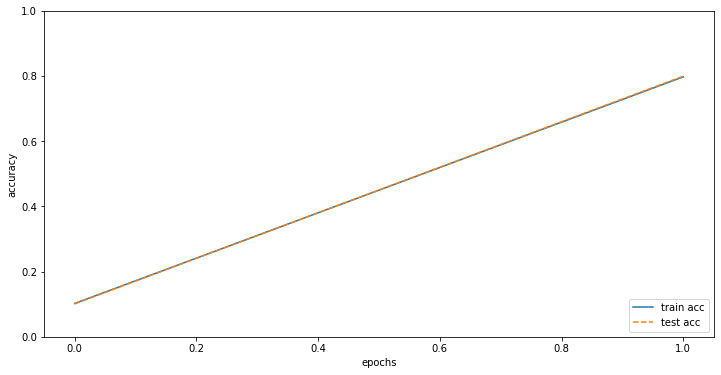

In [34]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

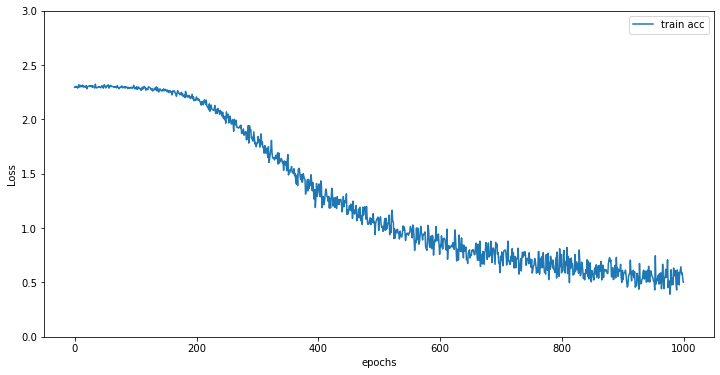

In [35]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()